## Snapped boxes for inequalities evaluation

The dataset for this worksheet is dataExtreme.json.

### Summary

This data explores some extreme parameter settings, with relatively small datasets that don't contain enough samples.

Nevertheless, we learn that very small bases (below 1.5), and small group size (1,1) don't provide enough protection.

We also learn that inequalities with 'equal' (<= or >=) have a positive average error, whereas those without (< or >) have a negative average error. Need to see if we can fix this.

In [23]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import sys
stdout = sys.stdout

with open('dataExtreme.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame.from_dict(data['selected'])

In [24]:

display(df.head())

,groupMin,groupMax,cluster,op,base,numPoints,trueErrAvg,trueErrStd,P,PI,noisyErrAvg,noisyErrStd,noisyDiffsAvg,noisyDiffsStd
0,2,6,1,lte,5.0,200,0.150754,1.490705,41.67,-19.47,0.345059,2.104214,0.989950,2.157884
1,2,6,1,lte,2.0,200,0.202680,1.135513,41.38,-20.06,0.257956,1.845671,0.984925,1.894909
2,2,6,1,lte,1.9,200,0.247906,1.035697,36.84,-29.36,0.157454,1.805658,1.005025,2.116547
3,2,6,1,lte,1.7,200,0.182580,1.138923,50.00,-2.41,-0.048576,1.773023,1.000000,2.012587
4,2,6,1,lte,1.5,200,0.311558,1.206839,31.58,-40.14,0.107203,1.811197,1.000000,1.909572


I made some datasets with different seeds but otherwise same params just to see the effect of randomness on results. These datasets have a group of 10 with around 520 points, and another group of 10 with around 2000 points. So let's look at those, and at the same time remove the differently seeded datapoints from the basic set.

In [25]:
dfSeed = df.query('numPoints > 515')
df = df.query('numPoints < 505')

Text(0.5, 0.98, 'Effect of random seed')

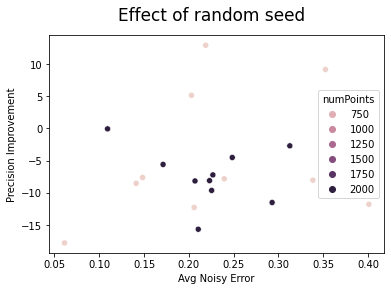

In [26]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=dfSeed, x="noisyErrAvg", y="PI",hue='numPoints')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg Noisy Error')
fig.suptitle('Effect of random seed', fontsize = 17)

That's a pretty big effect. The larger set has a little less variation, but still quite a bit. Good to know.

In [27]:
df.describe(include='all')

,groupMin,groupMax,cluster,op,base,numPoints,trueErrAvg,trueErrStd,P,PI,noisyErrAvg,noisyErrStd,noisyDiffsAvg,noisyDiffsStd
count,416.000000,416.000000,416.000000,416,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,lte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.730769,3.846154,4.500000,NaN,2.128077,257.692308,0.000000,0.591389,30.953558,6.076635,0.019964,1.677965,2.313198,18.091165
std,0.444094,2.127363,3.504214,NaN,1.263139,118.376412,0.129595,0.503529,24.796608,21.972070,0.192405,0.215067,3.651215,17.958402
min,1.000000,1.000000,1.000000,NaN,1.010000,200.000000,-0.388889,0.000000,0.000000,-42.260000,-0.620915,1.320166,-0.057692,1.814643
25%,1.000000,1.000000,1.750000,NaN,1.500000,200.000000,-0.082800,0.000000,7.690000,-7.255000,-0.117351,1.514272,0.010000,3.255730
50%,2.000000,3.000000,3.500000,NaN,1.700000,200.000000,0.000000,0.623135,26.840000,0.000000,0.018965,1.616547,0.550602,14.068505
75%,2.000000,6.000000,6.250000,NaN,2.000000,200.000000,0.082800,1.086613,50.162500,17.895000,0.152731,1.830022,2.639216,28.465774


Text(0.5, 0.98, 'Overview of all data')

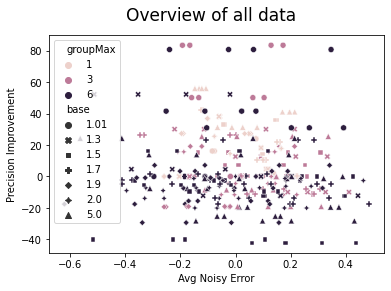

In [28]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="noisyErrAvg", y="PI",style='base',hue='groupMax')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg Noisy Error')
fig.suptitle('Overview of all data', fontsize = 17)

The above graph shows that a very tiny base (1.01) can have high PI (80% or so). So let's just drop those points from our data. 

Note also that there is very little apparent correlation between Error and PI. 

In [29]:
df = df.query('base > 1.1')

Text(0.5, 0.98, 'Data with base > 1.1')

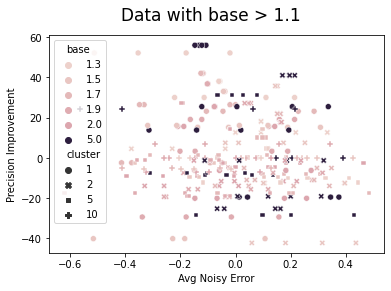

In [30]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="noisyErrAvg", y="PI",style='cluster',hue='base')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg Noisy Error')
fig.suptitle('Data with base > 1.1', fontsize = 17)

This is better, but I don't like those data points above PI>50%.

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Precision')]

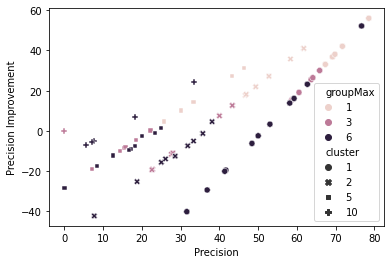

In [31]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="P", y="PI",style='cluster',hue='groupMax')
ax.set(ylabel = 'Precision Improvement', xlabel='Precision')
#fig.suptitle('Overview of all data', fontsize = 17)

The "cluster" simply determines how many singletons there are (basically higher cluster means fewer singletons). A singleton is a distinct value. The correlation comes from the fact that the baseline from which PI is computed is the fraction of correct positive predictions to all positive predictions when every prediction is positive (i.e. predicts that the victim is present). Data with more singletons simply means higher precision. 

But still, why such a huge variation in PI?

Let's get rid of the data points with group size of (1,1), which is unrealistic.

In [32]:
df = df.query('groupMin > 1')

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Precision')]

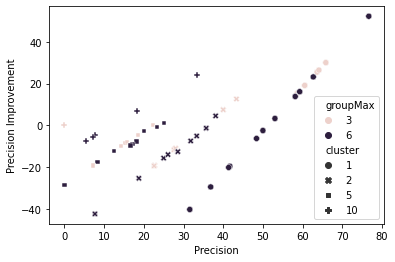

In [33]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="P", y="PI",style='cluster',hue='groupMax')
ax.set(ylabel = 'Precision Improvement', xlabel='Precision')
#fig.suptitle('Overview of all data', fontsize = 17)

So what is that outlier???

In [34]:
dfOut = df.query('PI > 40')
display(dfOut.head())

,groupMin,groupMax,cluster,op,base,numPoints,trueErrAvg,trueErrStd,P,PI,noisyErrAvg,noisyErrStd,noisyDiffsAvg,noisyDiffsStd
5,2,6,1,lte,1.3,200,0.087102,1.250148,76.67,52.21,-0.179229,1.933380,0.98995,2.124865
12,2,6,1,lt,1.3,200,-0.246231,1.259064,76.67,52.21,-0.512563,1.948651,0.98995,2.236045
19,2,6,1,gte,1.3,200,0.246231,1.259064,76.67,52.21,-0.020101,1.954069,0.00500,14.120265
26,2,6,1,gt,1.3,200,-0.087102,1.250148,76.67,52.21,-0.353434,1.947475,0.00500,14.112433


Ok, the outlier has a small base (1.3). So let's get rid of that as well.


In [35]:
df = df.query('base > 1.3')

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Precision')]

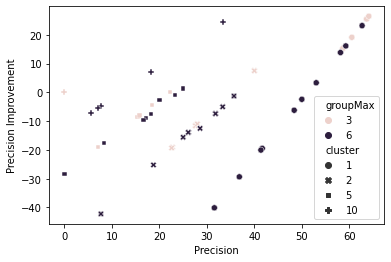

In [36]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="P", y="PI",style='cluster',hue='groupMax')
ax.set(ylabel = 'Precision Improvement', xlabel='Precision')
#fig.suptitle('Overview of all data', fontsize = 17)

The remaining higher PI's come from the smaller group size (min=2,max=3).

So let's get rid of those as well...

In [37]:
df = df.query('groupMax == 6')

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Avg Noisy Error')]

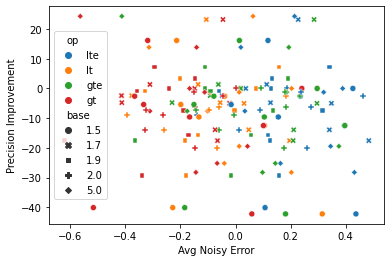

In [38]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="noisyErrAvg", y="PI",style='base',hue='op')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg Noisy Error')

Well that is better. Kindof interesting that all of the really negative PIs (PI=-40) are for base = 1.5.

Also note that average error (and therefore bias in the data) tends to be positive for inequalities with 'equal' in them (lte or gte), and negative otherwise.

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Avg True Error')]

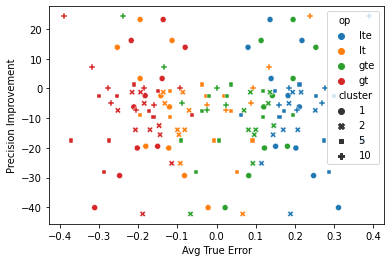

In [39]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="trueErrAvg", y="PI",style='cluster',hue='op')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg True Error')

The above shows that when the operation has '=' in it, the average error tends positive, otherwise negative. Let's look at this differs for base = 1.9 versus base = 2 (cause maybe the choice of midpoint operation matters).

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Avg True Error')]

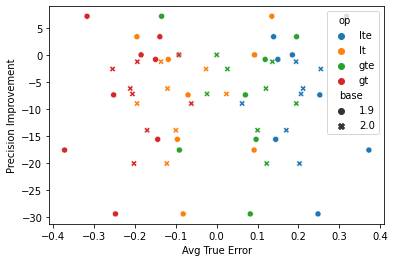

In [40]:
dfTemp = df.query('base == 1.9 or base == 2')
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=dfTemp, x="trueErrAvg", y="PI",style='base',hue='op')
ax.set(ylabel = 'Precision Improvement', xlabel='Avg True Error')

From the above, I don't see any effect of base.

Let's look at how datasets of 200 and 500 differ

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Avg True Error')]

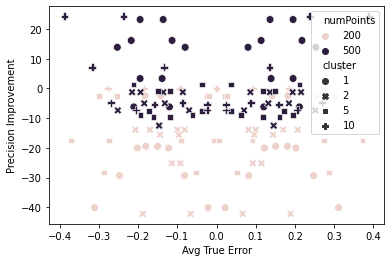

In [41]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="trueErrAvg", y="PI",style='cluster',hue='numPoints', s=60)
ax.set(ylabel = 'Precision Improvement', xlabel='Avg True Error')

Hmmmmm. The smaller data set overall has PI shifted downwards. Not sure why this would be. 

[Text(0, 0.5, 'Precision Improvement'), Text(0.5, 0, 'Precision')]

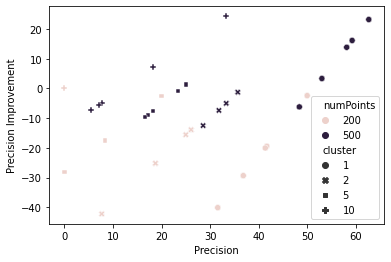

In [42]:
fig, axes = plt.subplots(1,1,figsize=(6,4))
ax = sns.scatterplot(data=df, x="P", y="PI",style='cluster',hue='numPoints')
ax.set(ylabel = 'Precision Improvement', xlabel='Precision')
#fig.suptitle('Overview of all data', fontsize = 17)

Ok, again it has to do with how I'm defining precision. Something is fishy here...

Inspecting the complete data, I see that the problem is that the smaller dataset has a very low true positive rate (a few percent). When the dataset is smaller, then we are dealing with small samples, and a difference of just one or two predictions can skew the data a lot.
